In [2]:
import rbm_pytorch_PT
import numpy as np
import pandas as pd
import torch
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt


%config InlineBackend.figure_format='retina'
plt.rcParams['figure.figsize']=[20,6]

In [4]:
LLs = []

PTs = [1, 2, 3, 4, 10]

for PT in PTs:
    tmp = []
    for i in range(1, 11):
        path = f'data_T18/Data_PT{PT}_lr001/Data_analysis_ID{i}/Loss_timeline.data_ising_lr0.001_wd0.0_mom0.0_epochs500'
        Loss = pd.read_csv(path, skiprows=2, header=None, sep=' +', engine='python')
        Loss.columns = pd.read_csv(path, skiprows=1, header=0, sep='|', engine='python').columns
        tmp.append(Loss[' ll mean '].values.astype(float)[:44])
    tmp = np.array(tmp)
    LLs.append(tmp)

In [5]:
LLGibbs = []
tmp = []
for i in range(1, 11):
    path = f'data_T18/Data_Gibbs/Data_analysis_ID{i}/Loss_timeline.data_ising_lr0.01_wd0.0_mom0.0_epochs500'
    Loss = pd.read_csv(path, skiprows=2, header=None, sep=' +', engine='python')
    Loss.columns = pd.read_csv(path, skiprows=1, header=0, sep='|', engine='python').columns
    tmp.append(Loss[' ll mean '].values.astype(float)[:44])
tmp = np.array(tmp)
LLGibbs = tmp


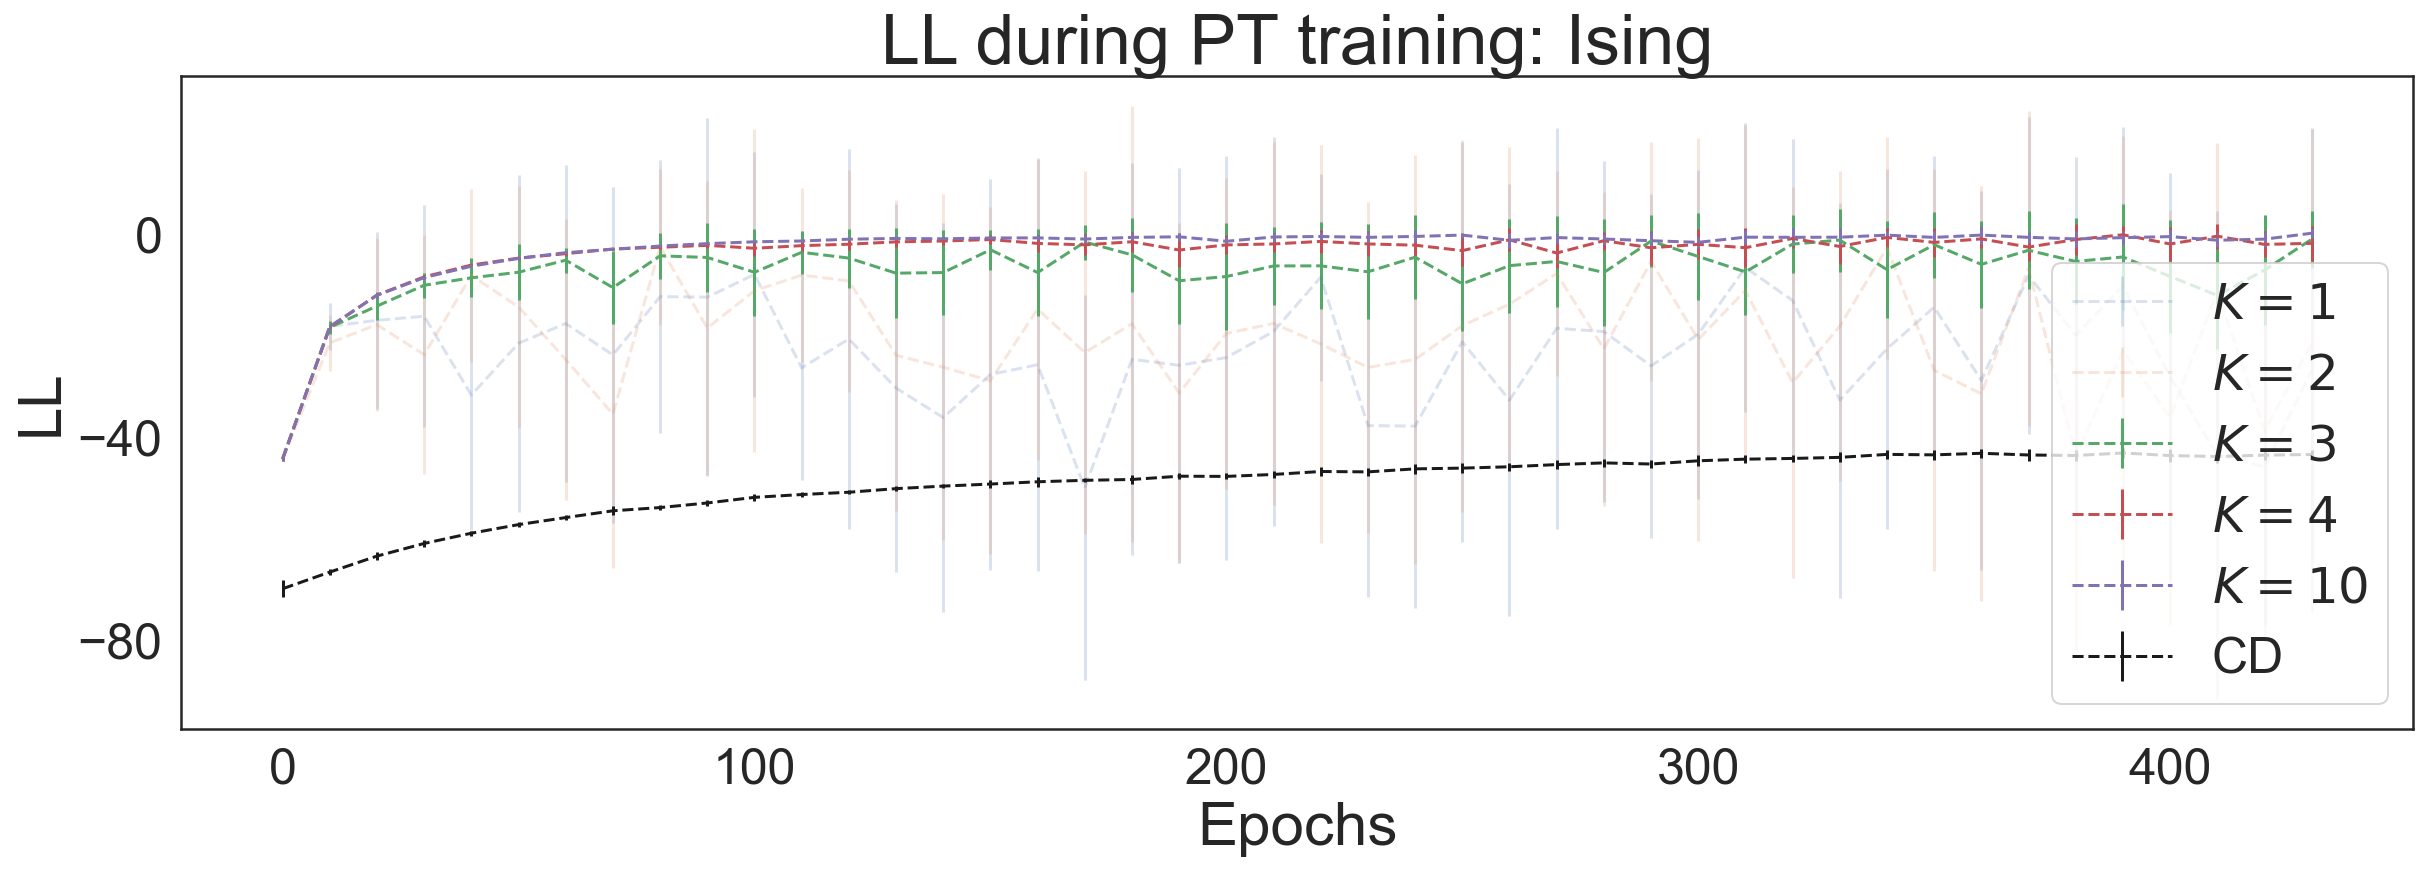

In [6]:
sns.set_style('white')

plt.figure(figsize=[20, 6])

labs = [f'$K={x}$' for x in PTs]


for i in range(len(PTs)):
    if i<2:
        plt.errorbar(x = np.arange(44), y = LLs[i].mean(axis=0), yerr = LLs[i].std(axis=0), label=labs[i], alpha=0.2, fmt='--')
    else:
        plt.errorbar(x = np.arange(44), y = LLs[i].mean(axis=0), yerr = LLs[i].std(axis=0), label=labs[i], alpha=1, fmt='--')
    
    
plt.errorbar(x = np.arange(44), y = LLGibbs.mean(axis=0), yerr = LLGibbs.std(axis=0), label='CD', alpha=1, fmt='k--')

plt.title('LL during PT training: Ising', fontsize=35)
plt.xlabel('Epochs', fontsize=30)
plt.ylabel('LL', fontsize=30)

plt.yticks([-80, -40, 0], fontsize=25)
plt.xticks(fontsize=25, ticks = [i*10 for i in range(5)], labels = [i*100 for i in range(5)])
plt.legend(fontsize=25)
plt.show()